In [ ]:
# for basic operations
import numpy as np
import pandas as pd
!pip install umap-learn
# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly as py
import plotly.graph_objs as go
import umap

     |████████████████████████████████| 81kB 4.0MB/s 
     |████████████████████████████████| 1.2MB 9.0MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=24deaf632114b6234b82cc27b7de3f38b19d8fa3029cc8f1cc28dd38c6e10941
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=7642dad07de6934611a57ae6f8e5b497341021b8f62aeeecb648a4551ae9d7ca
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import datasets, metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn import datasets, metrics
from sklearn.mixture import GaussianMixture
from sklearn import datasets, metrics
from matplotlib.patches import Ellipse
from sklearn.manifold import TSNE

## Functions 

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = ( df.isnull().sum().values / len(df))
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    return summary

## Background 
The Nation lost 35,092 people in crashes on U.S. roadways
during 2015, an increase from 32,744 in 2014. The 7.2-percent
increase is the largest percentage increase in nearly 50 years.
The largest percentage increase previously was an 8.1-percent
increase from 1965 to 1966. The estimated number of people
injured on the Nation’s roads increased in 2015, rising from 2.34
to 2.44 million injured people. Fatalities increased from 2014
to 2015 in almost all segments of the population—passenger
vehicle occupants, passengers of large trucks, pedestrians,
pedalcyclists, motorcyclists, alcohol-impaired driving fatalities, male/female, daytime/nighttime. Fatalities of drivers
of large trucks was one of the few groups that remained
unchanged. The estimated number of police-reported crashes
increased by 3.8 percent, from 6.0 to 6.3 million for more information [Click here](https://https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812318) .



## Reading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
accident_df = pd.read_csv('/content/drive/MyDrive/Thinkful/Data/accident.csv')

# checking the shape of the data


In [ ]:
print ("Total number of rows in dataset = {}".format(accident_df.shape[0]))
print ("Total number of columns in dataset = {}".format(accident_df.shape[1]))

Total number of rows in dataset = 32166
Total number of columns in dataset = 52


## Some Analysis to Understand the Data

In [ ]:
# checking the head of the data
accident_df.head(10)

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,NHS,RUR_URB,FUNC_SYS,RD_OWNER,ROUTE,TWAY_ID,TWAY_ID2,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,SCH_BUS,RAIL,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,127,0,1,1,2015,5,2,40,0,1,3,1,3,SR-5,NaN,1754,33.878653,-87.325328,0,35,0,0,1,1,0,4,2,1,0,1,0,0000000,99,99,2,58,88,88,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,83,0,1,1,2015,5,22,13,1,1,1,1,1,I-65,NaN,3604,34.910442,-86.908708,0,34,0,0,1,1,0,3,2,10,0,10,0,0000000,99,99,22,20,88,88,0,0,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,0,1,1,2015,5,1,25,0,1,3,1,2,US-SR 6,NaN,1958,32.142006,-85.758456,0,42,0,0,1,1,0,4,2,1,0,1,0,0000000,99,99,1,45,99,99,0,0,0,1,1
3,1,10004,1,1,0,0,0,1,1,45,0,4,1,2015,1,0,57,0,1,4,1,3,SR-27,NaN,566,31.439814,-85.510300,0,53,0,0,1,1,0,4,2,10,0,10,0,0000000,99,99,1,15,88,88,0,0,0,1,1
4,1,10005,2,2,0,0,0,2,2,45,2050,7,1,2015,4,7,9,0,2,3,1,2,US-SR 53,HINTON WATERS AVE,308,31.319331,-85.515100,0,12,6,0,2,3,0,1,1,1,0,1,0,0000000,99,99,7,16,88,88,0,0,0,1,0
5,1,10006,1,1,0,0,0,2,2,111,0,8,1,2015,5,9,59,0,1,5,2,4,CR-82,NaN,0,33.438494,-85.389267,0,1,0,0,1,1,0,4,1,1,0,1,0,0000000,99,99,10,17,99,99,0,0,0,1,0
6,1,10007,1,1,0,0,0,2,2,89,1730,8,1,2015,5,18,33,1,2,3,1,2,US-SR 2,NaN,1030,34.773044,-86.527664,0,43,0,0,1,1,0,4,3,1,0,1,0,0000000,99,99,18,38,99,99,0,0,0,1,0
7,1,10008,1,1,0,1,1,1,1,73,350,3,1,2015,7,21,30,0,2,5,4,6,ISHKOODA RD SW,NaN,0,33.462489,-86.870906,0,8,0,0,1,1,0,1,2,2,0,2,0,0000000,99,99,21,48,99,99,0,0,0,1,0
8,1,10009,1,1,0,0,0,1,1,117,47,13,1,2015,3,8,0,1,2,3,1,2,US-SR 3,NaN,2520,33.236100,-86.813922,0,23,0,0,1,1,0,4,1,10,0,10,0,0000000,99,99,8,3,88,88,0,0,0,1,0
9,1,10010,2,2,0,0,0,2,2,33,0,5,1,2015,2,18,45,0,1,4,1,3,SR-184,NaN,34,34.758367,-87.607508,0,12,2,0,1,1,0,1,2,1,0,1,0,0000000,99,99,19,1,99,99,0,0,0,1,0


In [ ]:
# describing the data

accident_df.describe()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,NHS,RUR_URB,FUNC_SYS,RD_OWNER,ROUTE,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,SCH_BUS,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
count,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.0,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000,32166.000000
mean,27.604769,276729.623733,1.556177,1.520954,0.035224,0.214854,0.223746,2.281602,2.290493,91.225051,1197.810918,15.556208,6.790680,2015.0,4.101598,13.465056,28.954766,0.732730,1.976932,11.387397,28.327800,3.758472,13996.343437,37.011498,-85.209389,0.037275,18.118635,1.832463,0.045918,2.198906,1.575017,0.034322,2.386619,1.888360,3.654480,0.301778,3.808711,0.003295,58.146770,65.836318,60.199745,67.465243,73.441553,77.563576,1.207362,0.202916,0.110893,1.090966,0.283187
std,16.255169,162486.332746,0.889722,0.852961,0.265838,0.480884,0.507696,1.940505,1.945197,94.670319,1889.385749,8.774020,3.354665,0.0,2.093137,10.211572,18.397755,1.804388,1.779417,25.619525,42.878005,2.056157,34398.920180,7.164869,87.153916,0.421345,14.112285,5.527316,0.261123,5.242728,4.725029,0.293571,4.525417,1.146641,10.556759,2.061510,10.581454,0.057312,42.992741,36.480061,42.798099,36.251700,35.864337,30.120705,5.475570,3.481240,3.199960,0.365794,0.467420
min,1.000000,10001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2015.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,19.273050,-166.549556,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,12.000000,122183.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,31.000000,0.000000,8.000000,4.000000,2015.0,2.000000,7.000000,14.000000,0.000000,1.000000,3.000000,1.000000,2.000000,0.000000,33.135731,-97.830091,0.000000,8.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,15.000000,31.000000,15.000000,33.000000,23.000000,58.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,28.000000,280002.500000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,71.000000,0.000000,15.000000,7.000000,2015.0,4.000000,14.000000,29.000000,0.000000,2.000000,4.000000,2.000000,3.000000,51.000000,36.427731,-87.641267,0.000000,12.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,99.000000,98.000000,99.000000,98.000000,88.000000,88.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,42.000000,420565.750000,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,3.000000,115.000000,1950.000000,23.000000,10.000000,2015.0,6.000000,19.000000,44.000000,1.000000,2.000000,5.000000,98.000000,6.000000,351.000000,40.640503,-81.308249,0.000000,30.000000,2.000000,0.000000,2.000000,1.000000,0.000000,4.000000,2.000000,2.000000,0.000000,2.000000,0.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,56.000000,560130.000000,58.000000,58.000000,11.000000,16.000000,16.000000,93.000000,93.000000,999.000000,9999.000000,31.000000,12.000000,2015.0,7.000000,99.000000,99.000000,9.000000,9.000000,99.000000,

## View summary of dataset
 Checking the percentage of missing data, type of the data, number of unique values contains in all the columns

In [ ]:
result = resumetable(accident_df)
result

Dataset Shape: (32166, 52)


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,STATE,int64,0.000000,51,1,1
1,ST_CASE,int64,0.000000,32166,10001,10002
2,VE_TOTAL,int64,0.000000,19,1,1
3,VE_FORMS,int64,0.000000,18,1,1
4,PVH_INVL,int64,0.000000,10,0,0
5,PEDS,int64,0.000000,11,0,0
6,PERNOTMVIT,int64,0.000000,12,0,0
7,PERMVIT,int64,0.000000,37,1,1
8,PERSONS,int64,0.000000,36,1,1
9,COUNTY,int64,0.000000,288,127,83


## Dropping the features with more than 50% missing values.

Explore FATALS variable

In [ ]:
accident_df["FATALS"].value_counts()

1     29816
2      1938
3       300
4        77
5        24
6         9
10        1
8         1
Name: FATALS, dtype: int64

 Explore RAIL variable

In [ ]:
accident_df.RAIL.unique()

array(['0000000', '725401E', '352190C', '726861K', '725393P', '431263D',
       '668061N', '600720A', '787548A', '9999999', '000000', '057352R',
       '003370N', '631121P', '99999', '339808G', '620904E', '272483J',
       '624473D', '623070L', '624338K', '627835x', '8888888', '628181v',
       '632474F', '0', '723002L', '638337U', '718397A', '662656Y',
       '058852S', '819338C', '289067H', '176980Y', '546539L', '294431D',
       '004627A', '290502J', '283170A', '353636K', '724650G', '478752W',
       '260567V', '478312F', '735902L', '292324G', '850412H', '850417S',
       '735873D', '870449C', '543052S', '009617L', '343595f', '725126L',
       '343545C', '300155V', '767687R', '5481805', '536524U', '080734U',
       '187026V', '725469T', '673302K', '665637E', '445951G', '098922N',
       '059754E', '817824K', '501717U', '630465A', '630807X', '086787N',
       '394037C', '518532N', '142326H', '262043R', '155091M', '477635X',
       '142331E', '524059N', '433945U', '434174W', '534960b'

In [ ]:
accident_df['TWAY_ID'].unique()

array(['SR-5', 'I-65', 'US-SR 6', ..., 'CR-254', 'YELLOWSTONE HWY',
       'US-85/S GREELEY HWY'], dtype=object)

In [ ]:
len(accident_df['TWAY_ID'].unique())

15543

We can see that there are 15543 unique labels in the TWAY_ID variable. The total number of instances in the dataset is 32166. So, it is approximately a unique identifier for each of the instances. Thus this is not a variable that we can use. Hence, I will drop it.

Deleteing unnecessery features 

In [ ]:
accident_df_dm=accident_df.drop(['TWAY_ID','TWAY_ID2'],axis=1)


In [ ]:
accident_df_dm.shape

(32166, 50)

## Check for any NaN value in rows.

In [ ]:
accident_df_dm2=accident_df_dm.dropna()
accident_df_dm2.shape

(32166, 50)

there is no NaN values in the dataset. 

Now, we can see that redundant columns have been removed from the dataset.

We can see that, there are 1 character variables (data type = object) and remaining 49 numerical variables (data type = int64).

In [ ]:
X = accident_df_dm

y = accident_df_dm['RAIL']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['RAIL'] = le.fit_transform(X['RAIL'])

y = le.transform(y)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32166 entries, 0 to 32165
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATE       32166 non-null  int64  
 1   ST_CASE     32166 non-null  int64  
 2   VE_TOTAL    32166 non-null  int64  
 3   VE_FORMS    32166 non-null  int64  
 4   PVH_INVL    32166 non-null  int64  
 5   PEDS        32166 non-null  int64  
 6   PERNOTMVIT  32166 non-null  int64  
 7   PERMVIT     32166 non-null  int64  
 8   PERSONS     32166 non-null  int64  
 9   COUNTY      32166 non-null  int64  
 10  CITY        32166 non-null  int64  
 11  DAY         32166 non-null  int64  
 12  MONTH       32166 non-null  int64  
 13  YEAR        32166 non-null  int64  
 14  DAY_WEEK    32166 non-null  int64  
 15  HOUR        32166 non-null  int64  
 16  MINUTE      32166 non-null  int64  
 17  NHS         32166 non-null  int64  
 18  RUR_URB     32166 non-null  int64  
 19  FUNC_SYS    32166 non-nul

##  Preview the dataset again

In [ ]:
X.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,NHS,RUR_URB,FUNC_SYS,RD_OWNER,ROUTE,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,SCH_BUS,RAIL,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,127,0,1,1,2015,5,2,40,0,1,3,1,3,1754,33.878653,-87.325328,0,35,0,0,1,1,0,4,2,1,0,1,0,2,99,99,2,58,88,88,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,83,0,1,1,2015,5,22,13,1,1,1,1,1,3604,34.910442,-86.908708,0,34,0,0,1,1,0,3,2,10,0,10,0,2,99,99,22,20,88,88,0,0,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,0,1,1,2015,5,1,25,0,1,3,1,2,1958,32.142006,-85.758456,0,42,0,0,1,1,0,4,2,1,0,1,0,2,99,99,1,45,99,99,0,0,0,1,1
3,1,10004,1,1,0,0,0,1,1,45,0,4,1,2015,1,0,57,0,1,4,1,3,566,31.439814,-85.510300,0,53,0,0,1,1,0,4,2,10,0,10,0,2,99,99,1,15,88,88,0,0,0,1,1
4,1,10005,2,2,0,0,0,2,2,45,2050,7,1,2015,4,7,9,0,2,3,1,2,308,31.319331,-85.515100,0,12,6,0,2,3,0,1,1,1,0,1,0,2,99,99,7,16,88,88,0,0,0,1,0


In [ ]:
X.RAIL.unique()

array([  2,  83,  31,  85,  82,  37,  70,  56,  91, 102,   1,   6,   3,
        65, 101,  28,  57,  20,  60,  58,  59,  61, 100,  62,  66,   0,
        79,  67,  77,  68,   7,  94,  22,  16,  54,  25,   4,  23,  21,
        32,  80,  45,  18,  44,  87,  24,  97,  98,  86,  99,  53,   5,
        30,  81,  29,  26,  90,  55,  51,  10,  17,  84,  71,  69,  41,
        12,   8,  93,  46,  63,  64,  11,  34,  47,  13,  19,  15,  43,
        14,  49,  38,  39,  50,  52,  48,  78,  76,  74,  75,  96,  95,
        40,  36,  27,  88,  92,  35,  89,  42,  73,   9,  33,  72])

## Clustering
Cluster analysis, or clustering, is an unsupervised machine learning task.

It involves automatically discovering natural grouping in data. Unlike supervised learning (like predictive modeling), clustering algorithms only interpret the input data and find natural groups or clusters in feature space. For more information click [here](https://https://machinelearningmastery.com/clustering-algorithms-with-python/).

The following clusters will be covered in this project.



*   K-means
*   Hierarchical clustering
*   The DBSCAN approach to clustering
*   Clustering with Gaussian mixture models





## K-Means Clustering

K-Means clustering is the most popular unsupervised learning algorithm. It is used when we have unlabelled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

## Data prerequisites for k-means¶
In order to successfully apply k-means to clustering problems, there are three prerequisites the data must meet. If you apply k-means to data that does not meet these assumptions, you will get incorrect, unintuitive results.

*   Cluster number is k K-means assumes that the correct cluster number is k
*   Clusters are isotropic K-means assumes that the underlying "true" clusters are radially symmetrical (isotropic), meaning that they are uniform in all directions and the edges curve outward. If this assumption fails, k-means would come up with unuseful clusters.
*   Similar variance K-means also assumes all clusters have similar variance




## Feature Scaling 

In [ ]:
cols = X.columns

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
X_std = pd.DataFrame(X_std, columns=[cols])

In [ ]:
X_std.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,NHS,RUR_URB,FUNC_SYS,RD_OWNER,ROUTE,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,SCH_BUS,RAIL,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,-1.636721,-1.641570,-0.625123,-0.610769,-0.132502,-0.446797,-0.440714,-0.660458,-0.663436,0.377896,-0.633978,-1.659038,-1.726184,0.0,0.429220,-1.122769,0.600367,-0.406089,-0.549027,-0.327388,-0.637348,-0.368884,-0.355899,-0.437258,-0.024279,-0.088469,1.196236,-0.331534,-0.175851,-0.228683,-0.121698,-0.116914,0.356521,0.097364,-0.251452,-0.146389,-0.265441,-0.0575,-0.056221,0.95025,0.909105,-1.359889,-0.261102,0.405937,0.346492,-0.220503,-0.058289,-0.034655,-0.248684,1.533577
1,-1.636721,-1.641564,-0.625123,-0.610769,-0.132502,-0.446797,-0.440714,-0.660458,-0.663436,-0.086882,-0.633978,-1.659038,-1.726184,0.0,0.429220,0.835824,-0.867226,0.148124,-0.549027,-0.405455,-0.637348,-1.341588,-0.302117,-0.293249,-0.019498,-0.088469,1.125375,-0.331534,-0.175851,-0.228683,-0.121698,-0.116914,0.135543,0.097364,0.601095,-0.146389,0.585117,-0.0575,-0.056221,0.95025,0.909105,-0.892571,-1.309345,0.405937,0.346492,-0.220503,-0.058289,-0.034655,-0.248684,-0.605862
2,-1.636721,-1.641558,-0.625123,-0.610769,-0.132502,-0.446797,-0.440714,-0.145120,-0.149341,-0.847428,-0.633978,-1.659038,-1.726184,0.0,0.429220,-1.220698,-0.214962,-0.406089,-0.549027,-0.327388,-0.637348,-0.855236,-0.349968,-0.679645,-0.006300,-0.088469,1.692266,-0.331534,-0.175851,-0.228683,-0.121698,-0.116914,0.356521,0.097364,-0.251452,-0.146389,-0.265441,-0.0575,-0.056221,0.95025,0.909105,-1.383255,-0.619711,0.712653,0.711695,-0.220503,-0.058289,-0.034655,-0.248684,1.533577
3,-1.636721,-1.641552,-0.625123,-0.610769,-0.132502,-0.446797,-0.440714,-0.660458,-0.663436,-0.488282,-0.633978,-1.317114,-1.726184,0.0,-1.481817,-1.318628,1.524407,-0.406089,-0.549027,-0.288355,-0.637348,-0.368884,-0.390435,-0.777651,-0.003453,-0.088469,2.471741,-0.331534,-0.175851,-0.228683,-0.121698,-0.116914,0.356521,0.097364,0.601095,-0.146389,0.585117,-0.0575,-0.056221,0.95025,0.909105,-1.383255,-1.447272,0.405937,0.346492,-0.220503,-0.058289,-0.034655,-0.248684,1.533577
4,-1.636721,-1.641546,0.498841,0.561636,-0.132502,-0.446797,-0.440714,-0.145120,-0.149341,-0.488282,0.451047,-0.975191,-1.726184,0.0,-0.048539,-0.633121,-1.084647,-0.406089,0.012964,-0.327388,-0.637348,-0.855236,-0.397936,-0.794468,-0.003508,-0.088469,-0.433575,0.754001,-0.175851,-0.037940,0.301587,-0.116914,-0.306412,-0.774762,-0.251452,-0.146389,-0.265441,-0.0575,-0.056221,0.95025,0.909105,-1.243059,-1.419686,0.405937,0.346492,-0.220503,-0.058289,-0.034655,-0.248684,-0.605862


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

## First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.



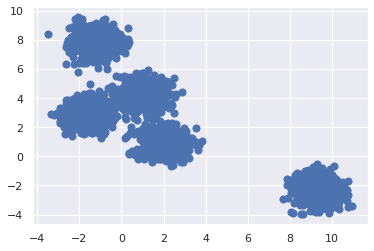

In [ ]:


from sklearn.datasets.samples_generator import make_blobs
X_std, y_true = make_blobs(n_samples=3000, centers=5,
                       cluster_std=0.60, random_state=0)
plt.scatter(X_std[:, 0], X_std[:, 1], s=50);



# By eye, it is relatively easy to pick out the five clusters. 

In [ ]:


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_std)
y_kmeans = kmeans.predict(X_std)



## Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

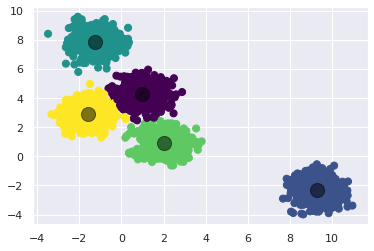

In [ ]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Choosing the Appropriate Number of Clusters

## The elbow method
The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K.

Text(0, 0.5, 'WCSS')

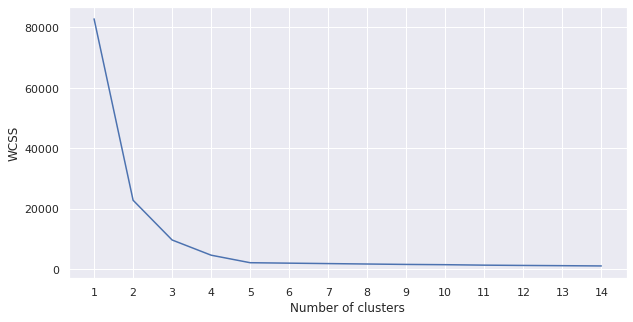

In [ ]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(i)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss)
plt.xticks(np.arange(1,15,step=1))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Determine the optimal number of clusters using 
Applying k-means on the whole dataset by setting k from 2-11 to get silhouette coefficient for each of them.

In [ ]:
 kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }

In [ ]:
    # A list holds the silhouette coefficients for each k
    silhouette_coefficients = []
  
    # Notice you start at 2 clusters for silhouette coefficient
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(X_std)
        score = silhouette_score(X_std, kmeans.labels_)
        silhouette_coefficients.append(score)

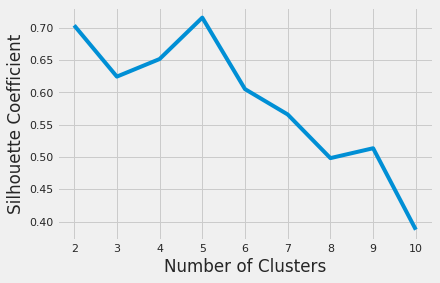

In [ ]:
    plt.style.use("fivethirtyeight")
    plt.plot(range(2, 11), silhouette_coefficients)
    plt.xticks(range(2, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Coefficient")
    plt.show()

## According to the results, the best solution is the five cluster solution as its silhouette score is the highest.

## Hierarchical clustering¶
Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

Agglomerative : This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.


Divisive : This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.
In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram.

In [ ]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=5)

# Fit model
clusters_agg = agg_cluster.fit_predict(X_std)

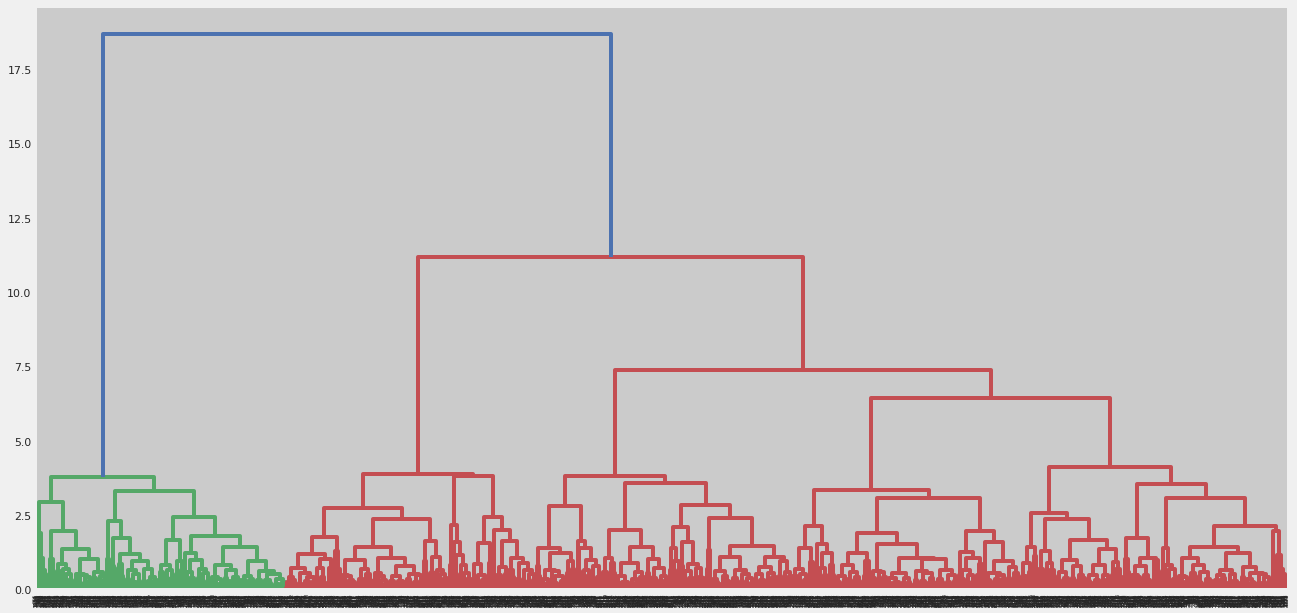

In [ ]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [ ]:
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_std) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,9.269472,-0.443971
1,0.471729,2.844125


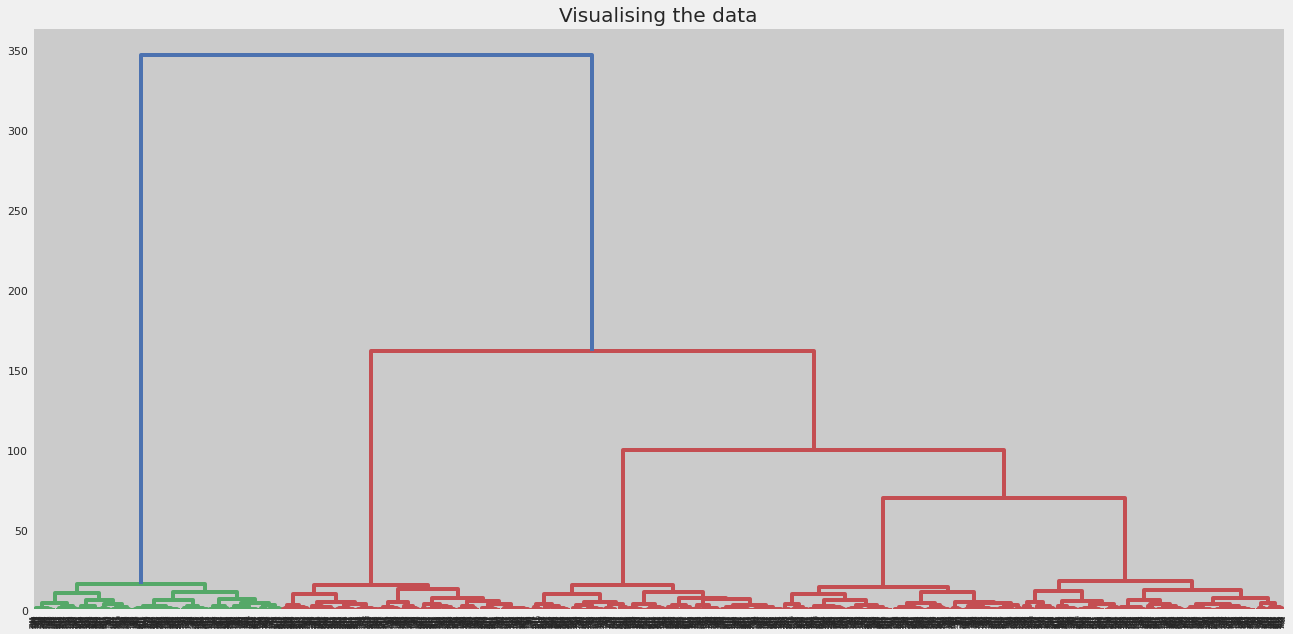

In [ ]:
plt.figure(figsize =(20, 10)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

## Determine the optimal number of clusters using [Silhouette Score](https://www.kaggle.com/vipulgandhi/kmeans-detailed-explanation).

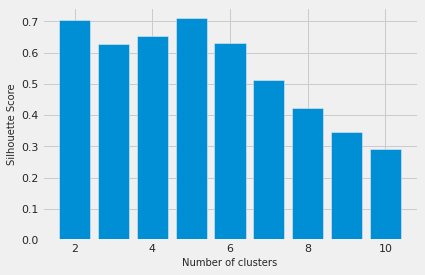

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

## Building and Visualizing clustering model for k = 5

In [ ]:
agg = AgglomerativeClustering(n_clusters=5)
agg.fit(X_principal)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

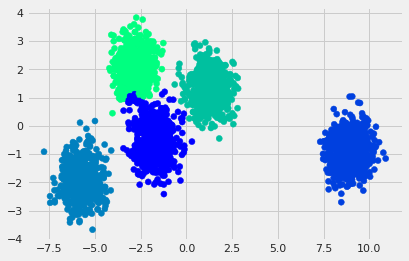

In [ ]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 5).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN). K-means and hierarchical clustering are good at finding circular (or convex) clusters, which makes them great tools for identifying well-separated clusters. But, unfortunately, they're not good at identifying clusters that are not well separated or that have nonconvex shapes such as rings inside rings.

DBSCAN can find clusters of any arbitrary shape.
 DBSCAN compares to** k-means** and hierarchical clustering:

DBSCAN does not require you to specify the number of clusters.
DBSCAN can find clusters of any shape.
DBSCAN is highly efficient and scales better than k-means and hierarchical clustering.
DBSCAN can also identify outliers in the data, which means that it isn't sensitive to outliers.

In [ ]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters_dbs = dbscan_cluster.fit_predict(X_std)

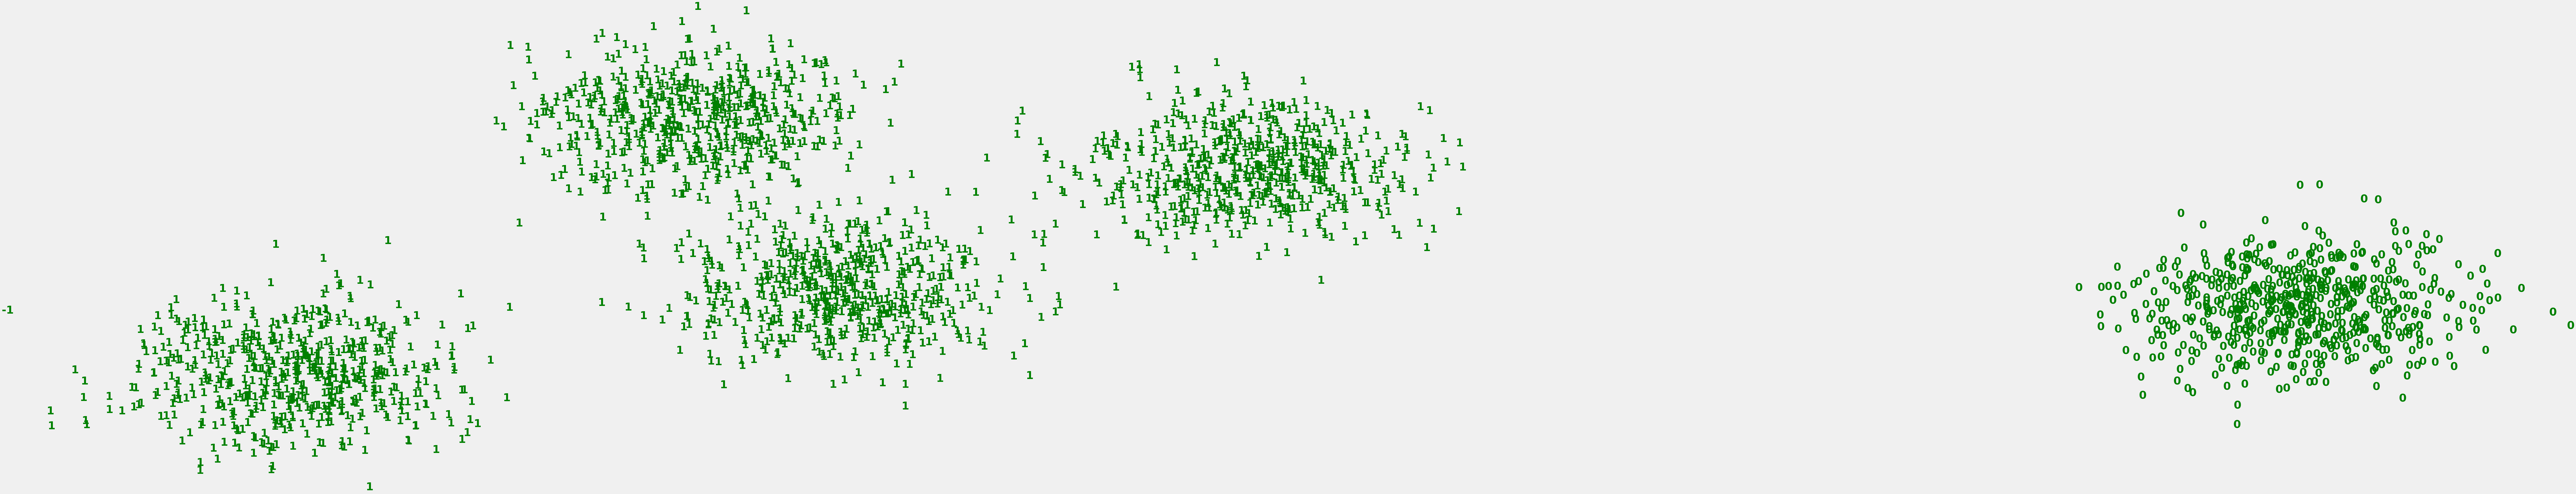

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters_dbs[i]),
             color='green',
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_dbs, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.37266597598468276


##  Checking  the effect of increasing eps on the number of clusters DBSCAN identifies

In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters_dbs = dbscan_cluster.fit_predict(X_std)

print("Number of clusters when eps=1 is: {}".format(len(np.unique(clusters_dbs))))

min_samples_list = range(2,51)

for i in [0.01,0.1,1,2,3,4,5,6,7,8,9,10]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters_dbs = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters_dbs))))

Number of clusters when eps=1 is: 3
Number of clusters when eps=0.01 is: 2932
Number of clusters when eps=0.1 is: 516
Number of clusters when eps=1 is: 3
Number of clusters when eps=2 is: 2
Number of clusters when eps=3 is: 2
Number of clusters when eps=4 is: 2
Number of clusters when eps=5 is: 1
Number of clusters when eps=6 is: 1
Number of clusters when eps=7 is: 1
Number of clusters when eps=8 is: 1
Number of clusters when eps=9 is: 1
Number of clusters when eps=10 is: 1


##  

Not partitionable for multiprocessor
systems.
• Datasets with altering densities are
tricky.
• Sensitive to clustering parameters
minPoints and EPS.
• Fails to identify cluster if density varies
and if the dataset is too sparse.
• Sampling affects density measures. 
Also, DBSCAN does not work to well when we are dealing with clusters of varying densities or with high dimensional data.
For more information click [here](https://www.researchgate.net/publication/271520302_Performance_Evaluation_of_Clustering_Algorithm_Using_Different_Datasets/download).

## Gaussian Mixture Models

A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. In the simplest case, GMMs can be used for finding clusters in the same manner as k-means.

The main advantages of GMM are as follows:

It's a soft clustering algorithm. So, you can assess the confidence of the cluster assignments by investigating the probabilities.
It doesn't assume anything about the geometry of the clusters, unlike k-means. So, it can also tackle nonlinear geometries.

In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=5, random_state=123)

# Fit model
clusters_gmm = gmm_cluster.fit_predict(X_std)

In order to visualize the results, we apply PCA and use the first two components. In the plot below, the numbers show the cluster each observation has been assigned to by the algorithm. 

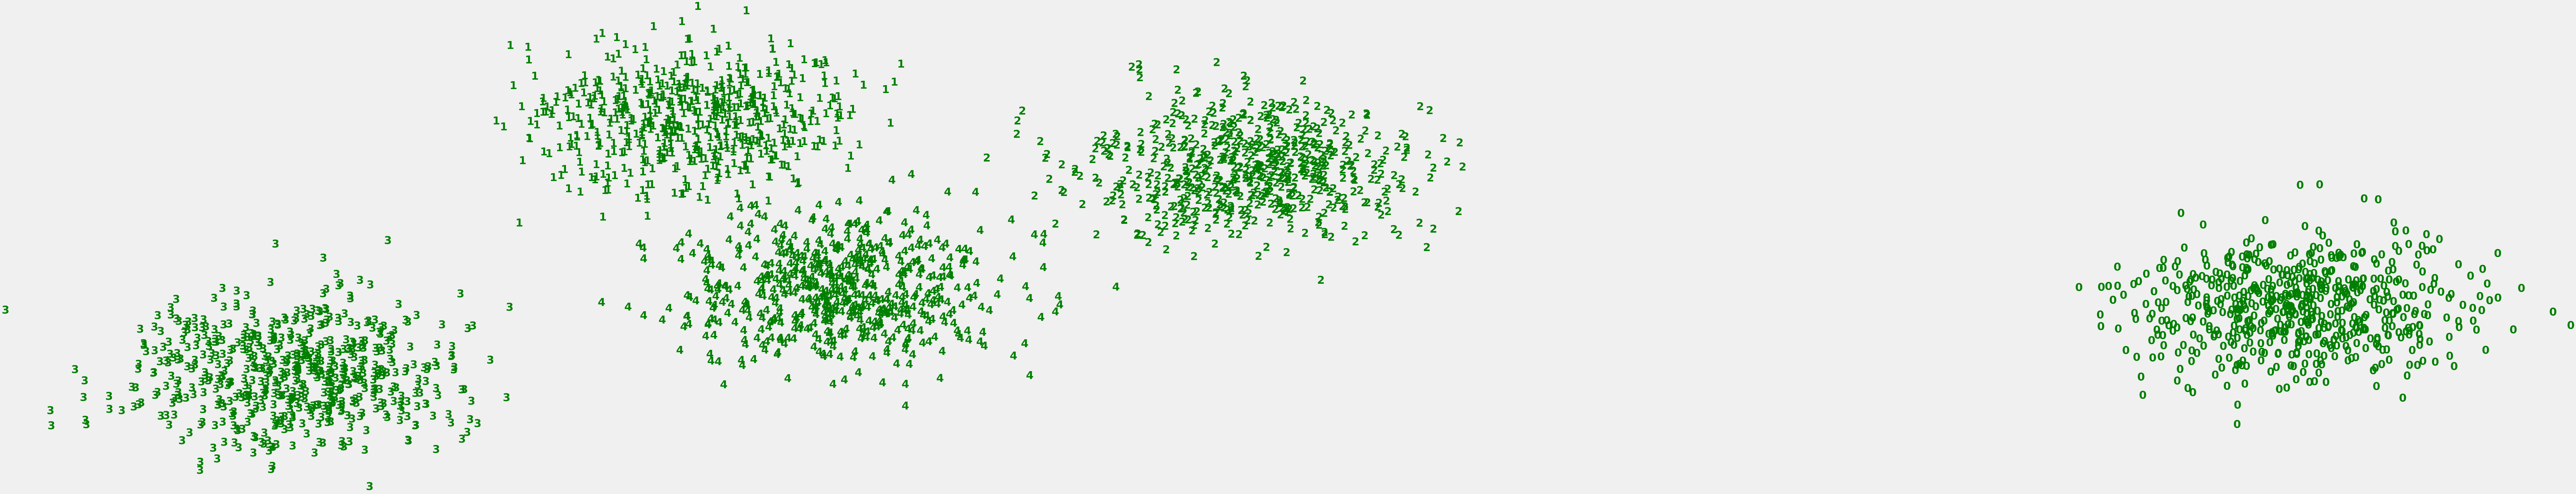

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters_gmm[i]),
             color='green',
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:

print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_gmm, metric='euclidean')))

The silhoutte score of the GMM solution: 0.7159277517874001


GMM is a lot more flexible in terms of cluster covariance
k-means is actually a special case of GMM in which each cluster’s covariance along all dimensions approaches 0. This implies that a point will get assigned only to the cluster closest to it. With GMM, each cluster can have unconstrained covariance structure. Think of rotated and/or elongated distribution of points in a cluster, instead of spherical as in kmeans. As a result, cluster assignment is much more flexible in GMM than in k-means[link text](https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm)

## Dimensionality Reduction

Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension

Dimensionality reduction can be achieved in the following ways:

###Feature Elimination: You reduce the feature space by eliminating features. This has a disadvantage though, as you gain no information from those features that you have dropped.

###Feature Selection: You apply some statistical tests in order to rank them according to their importance and then select a subset of features for your work. This again suffers from information loss and is less stable as different test gives different importance score to features. You can check more on this here.

###Feature Extraction: You create new independent features, where each new independent feature is a combination of each of the old independent features. These techniques can further be divided into linear and non-linear dimensionality reduction techniques.

## Common Dimensionality Reduction Techniques

*   Principal Component Analysis (PCA)
*   t-Distributed Stochastic Neighbor Embedding (t-SNE)
*   Uniform Manifold Approximation and Projection (UMAP)



## Principal Component Analysis or PCA 
is a linear feature extraction technique. It performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized. It does so by calculating the eigenvectors from the covariance matrix. The eigenvectors that correspond to the largest eigenvalues (the principal components) are used to reconstruct a significant fraction of the variance of the original data.

In simpler terms, PCA combines your input features in a specific way that you can drop the least important feature while still retaining the most valuable parts of all of the features. As an added benefit, each of the new features or components created after PCA are all independent of one another.

###  The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.

In [ ]:
pca = PCA(2)  # project from 50 to 2 dimensions
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(32166, 50)
(32166, 2)


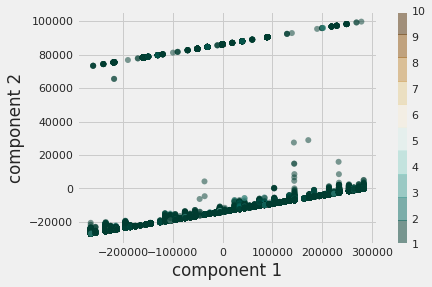

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=X.FATALS, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('BrBG_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

The full data is a 52-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 52-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

## Choosing the number of components
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

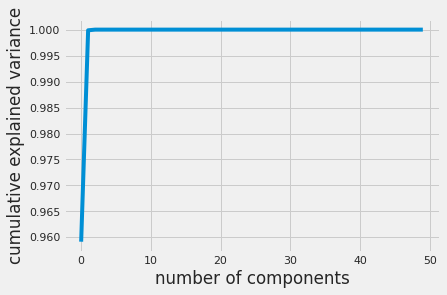

In [ ]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X)

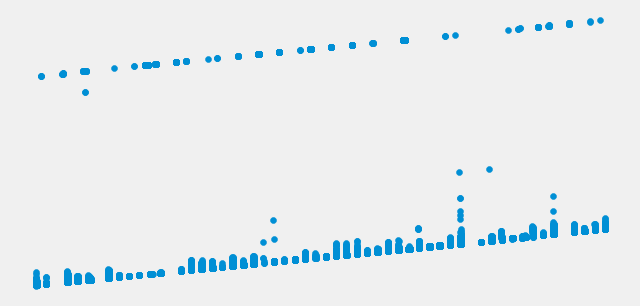

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=X.FATALS, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('BrBG_r', 10)) plt.xlabel('component 1') plt.ylabel('component 2') plt.colorbar();

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 32166 samples in 2.116s...
[t-SNE] Computed neighbors for 32166 samples in 3.411s...
[t-SNE] Computed conditional probabilities for sample 1000 / 32166
[t-SNE] Computed conditional probabilities for sample 2000 / 32166
[t-SNE] Computed conditional probabilities for sample 3000 / 32166
[t-SNE] Computed conditional probabilities for sample 4000 / 32166
[t-SNE] Computed conditional probabilities for sample 5000 / 32166
[t-SNE] Computed conditional probabilities for sample 6000 / 32166
[t-SNE] Computed conditional probabilities for sample 7000 / 32166
[t-SNE] Computed conditional probabilities for sample 8000 / 32166
[t-SNE] Computed conditional probabilities for sample 9000 / 32166
[t-SNE] Computed conditional probabilities for sample 10000 / 32166
[t-SNE] Computed conditional probabilities for sample 11000 / 32166
[t-SNE] Computed conditional probabilities for sample 12000 / 32166
[t-SNE] Computed conditional probabilities for sa

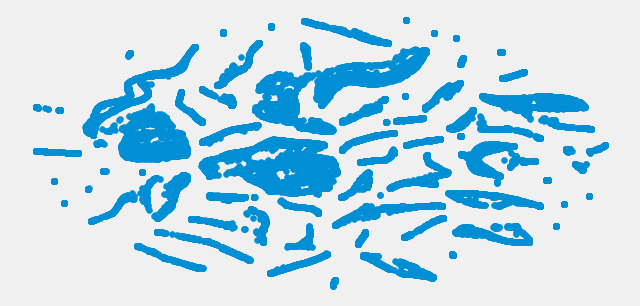

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 32166 samples in 2.415s...
[t-SNE] Computed neighbors for 32166 samples in 1.607s...
[t-SNE] Computed conditional probabilities for sample 1000 / 32166
[t-SNE] Computed conditional probabilities for sample 2000 / 32166
[t-SNE] Computed conditional probabilities for sample 3000 / 32166
[t-SNE] Computed conditional probabilities for sample 4000 / 32166
[t-SNE] Computed conditional probabilities for sample 5000 / 32166
[t-SNE] Computed conditional probabilities for sample 6000 / 32166
[t-SNE] Computed conditional probabilities for sample 7000 / 32166
[t-SNE] Computed conditional probabilities for sample 8000 / 32166
[t-SNE] Computed conditional probabilities for sample 9000 / 32166
[t-SNE] Computed conditional probabilities for sample 10000 / 32166
[t-SNE] Computed conditional probabilities for sample 11000 / 32166
[t-SNE] Computed conditional probabilities for sample 12000 / 32166
[t-SNE] Computed conditional probabilities for sam

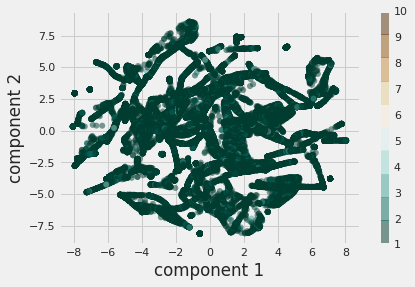

In [ ]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1],c=X.FATALS, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('BrBG_r', 10)) 
plt.xlabel('component 1') 
plt.ylabel('component 2')
plt.colorbar();

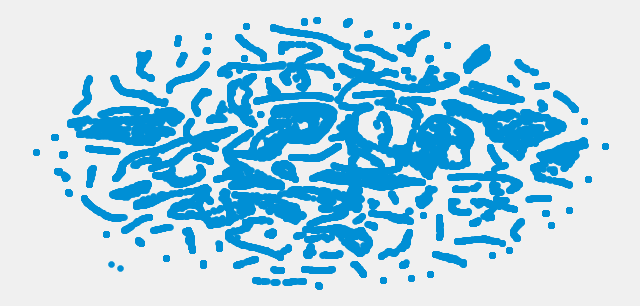

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 32166 samples in 2.396s...
[t-SNE] Computed neighbors for 32166 samples in 2.063s...
[t-SNE] Computed conditional probabilities for sample 1000 / 32166
[t-SNE] Computed conditional probabilities for sample 2000 / 32166
[t-SNE] Computed conditional probabilities for sample 3000 / 32166
[t-SNE] Computed conditional probabilities for sample 4000 / 32166
[t-SNE] Computed conditional probabilities for sample 5000 / 32166
[t-SNE] Computed conditional probabilities for sample 6000 / 32166
[t-SNE] Computed conditional probabilities for sample 7000 / 32166
[t-SNE] Computed conditional probabilities for sample 8000 / 32166
[t-SNE] Computed conditional probabilities for sample 9000 / 32166
[t-SNE] Computed conditional probabilities for sample 10000 / 32166
[t-SNE] Computed conditional probabilities for sample 11000 / 32166
[t-SNE] Computed conditional probabilities for sample 12000 / 32166
[t-SNE] Computed conditional probabilities for sam

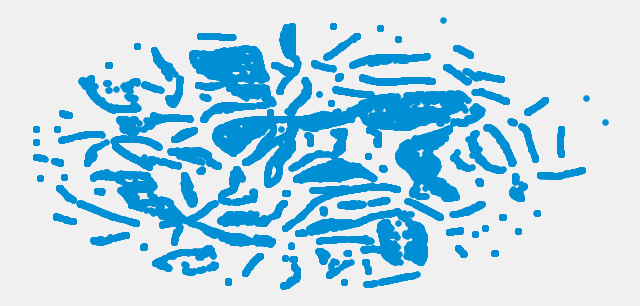

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 32166 samples in 2.313s...
[t-SNE] Computed neighbors for 32166 samples in 2.536s...
[t-SNE] Computed conditional probabilities for sample 1000 / 32166
[t-SNE] Computed conditional probabilities for sample 2000 / 32166
[t-SNE] Computed conditional probabilities for sample 3000 / 32166
[t-SNE] Computed conditional probabilities for sample 4000 / 32166
[t-SNE] Computed conditional probabilities for sample 5000 / 32166
[t-SNE] Computed conditional probabilities for sample 6000 / 32166
[t-SNE] Computed conditional probabilities for sample 7000 / 32166
[t-SNE] Computed conditional probabilities for sample 8000 / 32166
[t-SNE] Computed conditional probabilities for sample 9000 / 32166
[t-SNE] Computed conditional probabilities for sample 10000 / 32166
[t-SNE] Computed conditional probabilities for sample 11000 / 32166
[t-SNE] Computed conditional probabilities for sample 12000 / 32166
[t-SNE] Computed conditional probabilities for sam

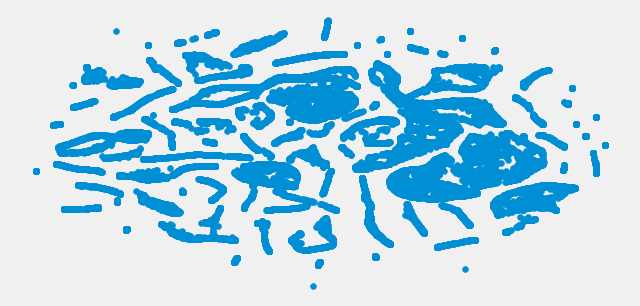

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 32166 samples in 2.379s...
[t-SNE] Computed neighbors for 32166 samples in 3.331s...
[t-SNE] Computed conditional probabilities for sample 1000 / 32166
[t-SNE] Computed conditional probabilities for sample 2000 / 32166
[t-SNE] Computed conditional probabilities for sample 3000 / 32166
[t-SNE] Computed conditional probabilities for sample 4000 / 32166
[t-SNE] Computed conditional probabilities for sample 5000 / 32166
[t-SNE] Computed conditional probabilities for sample 6000 / 32166
[t-SNE] Computed conditional probabilities for sample 7000 / 32166
[t-SNE] Computed conditional probabilities for sample 8000 / 32166
[t-SNE] Computed conditional probabilities for sample 9000 / 32166
[t-SNE] Computed conditional probabilities for sample 10000 / 32166
[t-SNE] Computed conditional probabilities for sample 11000 / 32166
[t-SNE] Computed conditional probabilities for sample 12000 / 32166
[t-SNE] Computed conditional probabilities for sa

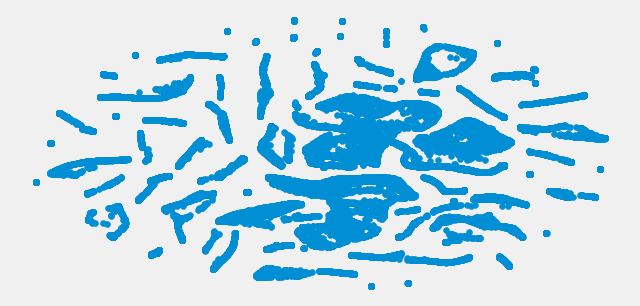

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 32166 samples in 2.281s...
[t-SNE] Computed neighbors for 32166 samples in 3.402s...
[t-SNE] Computed conditional probabilities for sample 1000 / 32166
[t-SNE] Computed conditional probabilities for sample 2000 / 32166
[t-SNE] Computed conditional probabilities for sample 3000 / 32166
[t-SNE] Computed conditional probabilities for sample 4000 / 32166
[t-SNE] Computed conditional probabilities for sample 5000 / 32166
[t-SNE] Computed conditional probabilities for sample 6000 / 32166
[t-SNE] Computed conditional probabilities for sample 7000 / 32166
[t-SNE] Computed conditional probabilities for sample 8000 / 32166
[t-SNE] Computed conditional probabilities for sample 9000 / 32166
[t-SNE] Computed conditional probabilities for sample 10000 / 32166
[t-SNE] Computed conditional probabilities for sample 11000 / 32166
[t-SNE] Computed conditional probabilities for sample 12000 / 32166
[t-SNE] Computed conditional probabilities for sa

In [ ]:
import seaborn as sns
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1] 
plt.figure(figsize=(16,10))
sns.scatterplot( x="tsne-2d-one", y="tsne-2d-two", hue=y, palette=sns.color_palette("hls", 10),data=df_subset, legend="full", alpha=0.3 )

ValueError: ignored

<Figure size 1152x720 with 0 Axes>

## All the different configurations of perplexity achieves better results than PCA, however choosing one of them isn't that much easy by just looking at unlabeled and uncolored graphs.

## [UMAP](https://https://github.com/lmcinnes/umap)

Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction. The algorithm is founded on three assumptions about the data:

The data is uniformly distributed on a Riemannian manifold;
The Riemannian metric is locally constant (or can be approximated as such);
The manifold is locally connected.


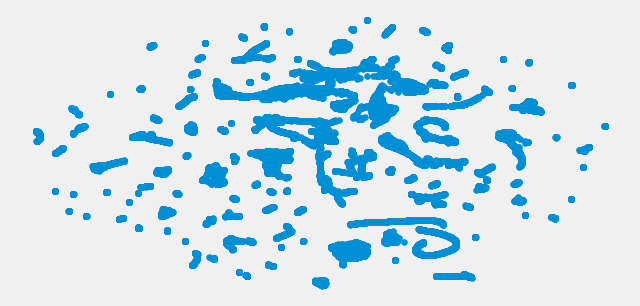

In [ ]:
umap_results = umap.UMAP(n_neighbors=100,
                      min_dist=.1,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

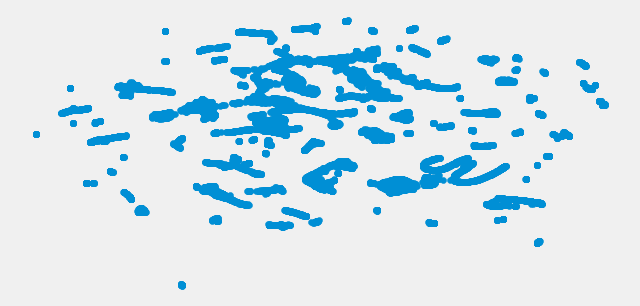

In [ ]:
umap_results = umap.UMAP(n_neighbors=200,
                      min_dist=.1,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

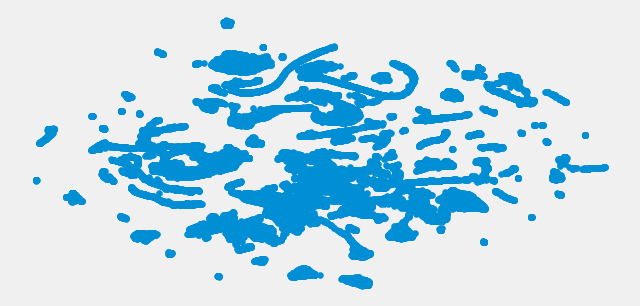

In [ ]:
umap_results = umap.UMAP(n_neighbors=100,
                      min_dist=.3,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

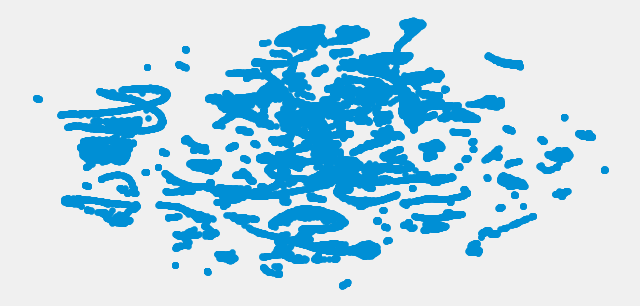

In [ ]:
umap_results = umap.UMAP(n_neighbors=50,
                      min_dist=.3,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## [Benefits of UMAP](https://https://github.com/lmcinnes/umap)
UMAP has a few signficant wins in its current incarnation.

First of all UMAP is fast. It can handle large datasets and high dimensional data without too much difficulty, scaling beyond what most t-SNE packages can manage. This includes very high dimensional sparse datasets. UMAP has successfully been used directly on data with over a million dimensions.

Second, UMAP scales well in embedding dimension—it isn't just for visualisation! You can use UMAP as a general purpose dimension reduction technique as a preliminary step to other machine learning tasks. With a little care it partners well with the hdbscan clustering library (for more details please see Using UMAP for Clustering).

Third, UMAP often performs better at preserving some aspects of global structure of the data than most implementations of t-SNE. This means that it can often provide a better "big picture" view of your data as well as preserving local neighbor relations.

Fourth, UMAP supports a wide variety of distance functions, including non-metric distance functions such as cosine distance and correlation distance. You can finally embed word vectors properly using cosine distance!

Fifth, UMAP supports adding new points to an existing embedding via the standard sklearn transform method. This means that UMAP can be used as a preprocessing transformer in sklearn pipelines.

Sixth, UMAP supports supervised and semi-supervised dimension reduction. This means that if you have label information that you wish to use as extra information for dimension reduction (even if it is just partial labelling) you can do that—as simply as providing it as the y parameter in the fit method.

Seventh, UMAP supports a variety of additional experimental features including: an "inverse transform" that can approximate a high dimensional sample that would map to a given position in the embedding space; the ability to embed into non-euclidean spaces including hyperbolic embeddings, and embeddings with uncertainty; very preliminary support for embedding dataframes also exists.

Finally, UMAP has solid theoretical foundations in manifold learning (see the paper on ArXiv). This both justifies the approach and allows for further extensions that will soon be added to the library.

In [ ]:
%%time
embedding = umap.UMAP(n_neighbors=5).fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



CPU times: user 42 s, sys: 6.78 s, total: 48.8 s
Wall time: 20.4 s


In [ ]:
import seaborn as sns
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1] 
plt.figure(figsize=(16,10))
sns.scatterplot( x="tsne-2d-one", y="tsne-2d-two", hue="y", palette=sns.color_palette("hls", 10),
data=df_subset, legend="full", alpha=0.3 )